In [ ]:
#实践训练

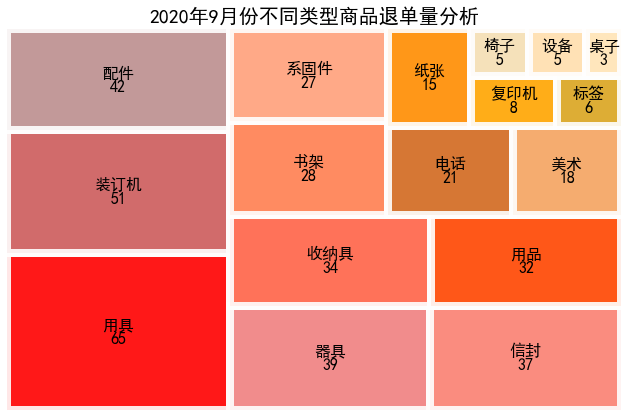

In [3]:
#实践1
#树状图
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.sans-serif']=['SimHei']     #显示中文
plt.rcParams['axes.unicode_minus']=False       #正常显示负号
import squarify

#读数据
df = pd.read_excel(r'D:\Python数据可视化分析与案例实战\ch07\退单量.xls')

plt.figure(figsize=(11,7))   #设置图形大小
colors = ['Red','IndianRed','RosyBrown','LightCoral','Salmon','Tomato',
          'OrangeRed','Coral','LightSalmon','Chocolate','SandyBrown','DarkOrange',
          'Orange','GoldEnrod','Wheat','NavajoWhite','Moccasin','Tan']   #设置颜色数据
plot=squarify.plot(
    sizes=df['退单量'],       #指定绘图数据
    label=df['商品类型'],      #标签
    color=colors,            #指定自定义颜色
    alpha=0.9,               #指定透明度
    value=df['退单量'],       #添加数值标签
    edgecolor='white',       #设置边界框白色
    linewidth=8              #设置边框宽度为3  
)

plt.rc('font',size=16)      #设置标签大小
plot.set_title('2020年9月份不同类型商品退单量分析',fontdict={'fontsize':20})    #设置标题及大小
plt.axis('off')    #去除坐标轴
plt.tick_params(top='off',right='off')    #去除上边框和右边框刻度
plt.show()

In [2]:
#实践2
#声明Notebook类型，必须在引入pyecharts.charts等模块前声明
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB

from pyecharts import options as opts
from pyecharts.charts import Sunburst

def sunburst() -> Sunburst:
    data = [
        opts.SunburstItem(
            name="商品",
            children=[
                opts.SunburstItem(
                    name="办公用品",
                    value=19,
                    children=[
                        opts.SunburstItem(name="标签",value=9,
                            children=[opts.SunburstItem(name="Avery", value=3),
                                      opts.SunburstItem(name="Harbour", value=4),
                                      opts.SunburstItem(name="Novimex", value=2)],
                        ),
                        opts.SunburstItem(name="器具", value=4,
                             children=[opts.SunburstItem(name="Breville", value=2)],
                        ),
                        opts.SunburstItem(name="收纳具", value=6,
                             children=[opts.SunburstItem(name="Fellowes", value=2),
                                      opts.SunburstItem(name="Eldon", value=3),
                                      opts.SunburstItem(name="Rogers", value=1)],
                        ),
                    ],
                ),
                opts.SunburstItem(
                    name="技术产品",
                    value=15,
                    children=[
                        opts.SunburstItem(name="手机",value=5,
                            children=[opts.SunburstItem(name="苹果", value=3),
                                      opts.SunburstItem(name="三星", value=2)],),
                        opts.SunburstItem(name="配件",value=3)
                    ],
                ),
                 opts.SunburstItem(
                    name="家具用品",
                    value=18,
                    children=[
                        opts.SunburstItem(name="桌子",value=7,
                            children=[opts.SunburstItem(name="Chromcraft", value=5),
                                      opts.SunburstItem(name="Bevis", value=2)],),
                        opts.SunburstItem(name="椅子",value=5),
                        opts.SunburstItem(name="书架",value=3)
                    ],
                ),
            ],
        ),
    ]

    c = (
        Sunburst()
        .add(series_name="产品类别旭日图", data_pair=data, radius=[0, "85%"])
        .set_global_opts(title_opts=opts.TitleOpts(title="产品类别及子类别旭日图"),
                         toolbox_opts=opts.ToolboxOpts())
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}"))
    )
    return c

#第一次渲染时候调用load_javascript文件
sunburst().load_javascript()
#展示数据可视化图表
sunburst().render_notebook()